# ANOVA

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv("data/anova_sample.txt", sep = "\t")

In [24]:
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [25]:
df_melt = pd.melt(df.reset_index(), id_vars = ["index"], value_vars = ["A", "B", "C", "D"])

In [26]:
df_melt

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [27]:
df_melt.columns = ["index", "treatments", "value"]

In [28]:
df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

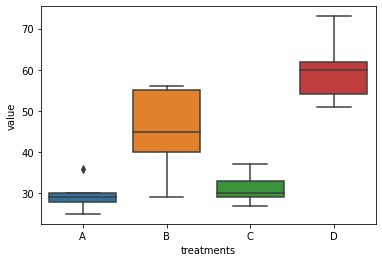

In [29]:
ax = sns.boxplot(x = "treatments", y = "value", data = df_melt)

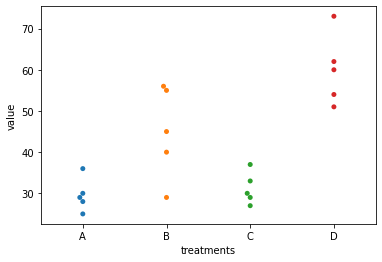

In [30]:
ax = sns.swarmplot(x = "treatments", y = "value", data = df_melt)

In [18]:
import scipy.stats as stats

In [20]:
fvalue, pvalue = stats.f_oneway(df["A"], df["B"], df["C"], df["D"])

In [21]:
fvalue, pvalue 

(17.492810457516338, 2.639241146210922e-05)

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
model = ols("value ~ C(treatments)", data = df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


# Test de Student

In [33]:
X1 = [1, 1, 1, 2, 1]
X2 = [4, 2, 3, 1, 1]

In [34]:
X1, X2

([1, 1, 1, 2, 1], [4, 2, 3, 1, 1])

In [36]:
x1, pval1 = stats.shapiro(X1)
x2, pval2 = stats.shapiro(X2)

In [37]:
pval1, pval2

(0.00013097839837428182, 0.421149343252182)

In [39]:
y = stats.ttest_ind(X1, X2)

In [40]:
y

Ttest_indResult(statistic=-1.6222142113076257, pvalue=0.14341462050621775)

In [52]:
echantillon = X1
y = stats.ttest_1samp(echantillon, popmean = 1)

In [53]:
y

Ttest_1sampResult(statistic=0.9999999999999998, pvalue=0.373900966300059)

# Test du χ²

In [54]:
data = [['18-29', 'Conservative'] for i in range(141)] + \
        [['18-29', 'Socialist'] for i in range(68)] + \
        [['18-29', 'Other'] for i in range(4)] + \
        [['30-44', 'Conservative'] for i in range(179)] + \
        [['30-44', 'Socialist'] for i in range(159)] + \
        [['30-44', 'Other'] for i in range(7)] + \
        [['45-65', 'Conservative'] for i in range(220)] + \
        [['45-65', 'Socialist'] for i in range(216)] + \
        [['45-65', 'Other'] for i in range(4)] + \
        [['65 & older', 'Conservative'] for i in range(86)] + \
        [['65 & older', 'Socialist'] for i in range(101)] + \
        [['65 & older', 'Other'] for i in range(4)]

In [59]:
df = pd.DataFrame(data, columns = ["Age Group", "Political Affiliation"])

In [60]:
df

,Age Group,Political Affiliation
0,18-29,Conservative
1,18-29,Conservative
2,18-29,Conservative
3,18-29,Conservative
4,18-29,Conservative
...,...,...
1184,65 & older,Socialist
1185,65 & older,Other
1186,65 & older,Other
1187,65 & older,Other


In [70]:
df["Age Group"].value_counts()

45-65         440
30-44         345
18-29         213
65 & older    191
Name: Age Group, dtype: int64

In [65]:
data_crosstab = pd.crosstab(df["Age Group"], 
                            df["Political Affiliation"],
                            margins = True, margins_name = "Total")

In [66]:
data_crosstab

Political Affiliation,Conservative,Other,Socialist,Total
Age Group,,,,
18-29,141,4,68,213
30-44,179,7,159,345
45-65,220,4,216,440
65 & older,86,4,101,191
Total,626,19,544,1189


In [67]:
rows = df["Age Group"].unique()

In [68]:
rows

array(['18-29', '30-44', '45-65', '65 & older'], dtype=object)

In [71]:
columns = df["Political Affiliation"].unique()

In [72]:
columns

array(['Conservative', 'Socialist', 'Other'], dtype=object)

In [81]:
chi_square = 0
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]["Total"] * data_crosstab["Total"][j] / data_crosstab["Total"]["Total"]
        chi_square += (O - E) ** 2 / E
chi_square

24.367421717305202

In [82]:
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows) - 1) * (len(columns) - 1))
p_value

0.0004469083391495099

# Test de Mann-Withney

In [88]:
df = pd.read_csv("data/genotype.txt")

In [98]:
df

,A,B
0,60,29
1,30,25
2,60,25
3,60,30
4,30,25
5,45,25
6,45,20
7,56,30
8,56,10
9,56,10


In [91]:
df.agg(["count", "min", "max", "median"])

,A,B
count,23.0,23.0
min,20.0,10.0
max,60.0,32.0
median,56.0,28.0


<AxesSubplot:>

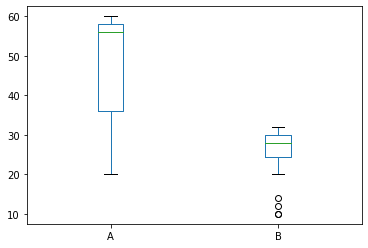

In [92]:
df.boxplot(column = ["A", "B"], grid = False)

In [93]:
w, pvalue = stats.shapiro(df["A"])
w, pvalue

(0.8239281177520752, 0.0009495539125055075)

In [94]:
w, pvalue = stats.shapiro(df["B"])
w, pvalue

(0.7946348190307617, 0.00031481595942750573)

Text(0.5, 0, 'Yield')

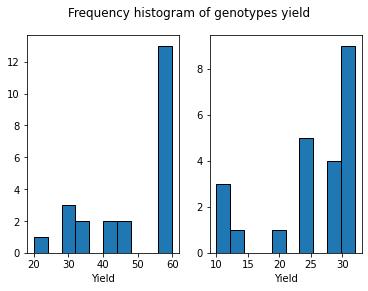

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Frequency histogram of genotypes yield")
ax1.hist(df["A"], bins = 10, histtype = "bar", ec = "k")
ax2.hist(df["B"], bins = 10, histtype = "bar", ec = "k")
ax1.set_xlabel("Yield")
ax2.set_xlabel("Yield")

In [99]:
stats.mannwhitneyu(x = df["A"], y = df["B"], alternative = "two-sided")

MannwhitneyuResult(statistic=489.5, pvalue=7.004695394561307e-07)

In [100]:
stats.mannwhitneyu(x = df["A"], y = df["B"], alternative = "less")

MannwhitneyuResult(statistic=489.5, pvalue=0.999999687507846)

In [101]:
stats.mannwhitneyu(x = df["A"], y = df["B"], alternative = "greater")

MannwhitneyuResult(statistic=489.5, pvalue=3.5023476972806534e-07)

# Test de Wilcoxon

In [104]:
df = pd.read_csv("data/blood_pressure.txt", sep = "\t")

In [105]:
df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


In [106]:
df[['bp_before', "bp_after"]].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


<AxesSubplot:>

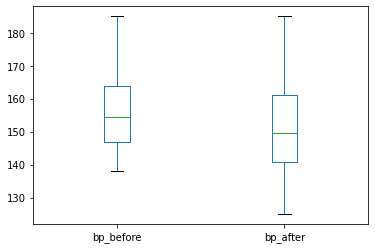

In [107]:
df.boxplot(column = ["bp_before", "bp_after"], grid = False)

((array([-2.52654228, -2.1978944 , -2.0086642 , -1.8721281 , -1.76356639,
         -1.67252351, -1.59354821, -1.5234211 , -1.46007481, -1.40209915,
         -1.3484871 , -1.29849326, -1.25154963, -1.20721295, -1.16513026,
         -1.12501567, -1.08663416, -1.04979006, -1.01431855, -0.98007946,
         -0.94695242, -0.9148333 , -0.8836313 , -0.85326673, -0.82366923,
         -0.79477627, -0.76653206, -0.73888652, -0.71179451, -0.68521516,
         -0.65911132, -0.6334491 , -0.60819743, -0.58332778, -0.55881382,
         -0.53463119, -0.51075726, -0.48717098, -0.46385269, -0.44078394,
         -0.41794744, -0.39532687, -0.37290682, -0.35067268, -0.32861058,
         -0.3067073 , -0.28495019, -0.26332716, -0.24182657, -0.2204372 ,
         -0.19914822, -0.17794913, -0.15682971, -0.13578003, -0.11479034,
         -0.09385111, -0.07295295, -0.05208661, -0.03124292, -0.0104128 ,
          0.0104128 ,  0.03124292,  0.05208661,  0.07295295,  0.09385111,
          0.11479034,  0.13578003,  0.

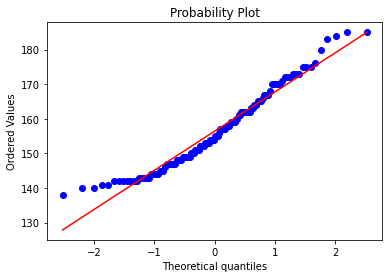

In [108]:
stats.probplot(df["bp_before"], dist = "norm", plot = plt)

((array([-2.52654228, -2.1978944 , -2.0086642 , -1.8721281 , -1.76356639,
         -1.67252351, -1.59354821, -1.5234211 , -1.46007481, -1.40209915,
         -1.3484871 , -1.29849326, -1.25154963, -1.20721295, -1.16513026,
         -1.12501567, -1.08663416, -1.04979006, -1.01431855, -0.98007946,
         -0.94695242, -0.9148333 , -0.8836313 , -0.85326673, -0.82366923,
         -0.79477627, -0.76653206, -0.73888652, -0.71179451, -0.68521516,
         -0.65911132, -0.6334491 , -0.60819743, -0.58332778, -0.55881382,
         -0.53463119, -0.51075726, -0.48717098, -0.46385269, -0.44078394,
         -0.41794744, -0.39532687, -0.37290682, -0.35067268, -0.32861058,
         -0.3067073 , -0.28495019, -0.26332716, -0.24182657, -0.2204372 ,
         -0.19914822, -0.17794913, -0.15682971, -0.13578003, -0.11479034,
         -0.09385111, -0.07295295, -0.05208661, -0.03124292, -0.0104128 ,
          0.0104128 ,  0.03124292,  0.05208661,  0.07295295,  0.09385111,
          0.11479034,  0.13578003,  0.

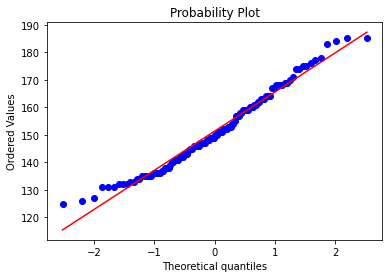

In [109]:
stats.probplot(df["bp_after"], dist = "norm", plot = plt)

In [110]:
w, pvalue = stats.shapiro(df["bp_before"])
w, pvalue

(0.9547787308692932, 0.0004928423441015184)

In [111]:
w, pvalue = stats.shapiro(df["bp_after"])
w, pvalue

(0.9740639328956604, 0.020227791741490364)

In [113]:
stats.wilcoxon(df["bp_before"], df["bp_after"])

WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)